# Generate Choice file for all participants (pet experiment)


In [35]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
# Useful to quickly extract csv files
import glob
import os

In [36]:
# Extract Rate data

In [37]:
# Load data all participants

#choiceNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/*_ChoiceData_PFT_RateChoice_MRI_Exp_*.csv')
#rateNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S*_RateData_PFT_RateChoice_MRI_Exp_*.csv')
#rateNameFrames.sort()
#choiceNameFrames.sort()

In [38]:
# Load data participants

select_subj = range(3,13) 

rateNameFrames = list()
choiceNameFrames = list()

for i in np.arange(len(select_subj)):
    choiceNameFrames1 = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S'+str(select_subj[i]).zfill(2)+'/*_ChoiceData_PFT_RateChoice_MRI_Exp_*.csv')
    rateNameFrames1 = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S'+str(select_subj[i]).zfill(2)+'/S*_RateData_PFT_RateChoice_MRI_Exp_*.csv')
    
    rateNameFrames1.sort()
    choiceNameFrames1.sort()
    
    rateNameFrames.extend(rateNameFrames1)
    choiceNameFrames.extend(choiceNameFrames1)


In [39]:
choiceNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_5.csv',
 '/Users/pradyumna/One

In [40]:
rateNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_5.csv',
 '/Users/pradyumna/OneDrive - Univ

## Join rating in this case

### ** Only for participant 1 (first scanner pilot) problem in even sessions , the rating appears flipped (1 when it should be 4 and viceversa), should be corrected (5 - originalRating = realRating) .

In [41]:
partic_num=len(rateNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameRawAll = pd.DataFrame( )

for j in range (partic_num):
    rateFrames = pd.read_csv(rateNameFrames[j])
    choiceFrames = pd.read_csv(choiceNameFrames[j]) 
    
   # print (rateFrames.rating)
    
    if 'ratL' in choiceFrames.columns:
        if 'ratR' in choiceFrames.columns:
            choiceFrames = choiceFrames.drop(['ratL', 'ratR'], axis=1)
   
    partNamesRate = [int(os.path.basename(choiceNameFrames[j])[1:3])]*len(rateFrames)
    partNamesChoice = [int(os.path.basename(rateNameFrames[j])[1:3])]*len(choiceFrames)

    sessionRate = [int(os.path.basename(choiceNameFrames[j])[-5])]*len(rateFrames)
    sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    
    rateFrames['part'] = partNamesRate 
    choiceFrames['part'] = partNamesChoice 

    rateFrames['session'] = sessionRate 
    choiceFrames['session'] = sessionChoice 

    
    # to fix rating in wrong participant
    if np.unique(partNamesRate) == 1 and np.unique(sessionRate)[0]%2 == 1: # participant 1 is the conflictive one.
        ratingFixed = 5 - rateFrames.rating.values
        rateFrames['rating'] = [-1 if x==6 else x for x in ratingFixed]
        print('into')

        
 #   print (rateFrames.rating)

        
    choiceFrameRawAll = pd.concat([choiceFrameRawAll,choiceFrames],ignore_index=True)
    rateFrameRawAll = pd.concat([rateFrameRawAll,rateFrames],ignore_index=True)

In [42]:
choiceFrameRawAll

,trial,trialOnset,leftId,rightId,frame,trialOnsetTim,trialSnd1Tim,trialSnd2Tim,trialThinkTime,trialRespTime,trialEnd,choice,choiceTime,primerSound,part,session
0,0.0,122.379519,6.0,2.0,2.0,0.008605,1.020741,1.521760,3.507088,3.507591,10.013129,1.0,6.394748,2.0,3,0
1,1.0,132.529415,5.0,6.0,1.0,0.010511,1.030361,1.531569,3.515307,3.515657,11.006220,1.0,4.217651,1.0,3,0
2,2.0,144.129619,6.0,2.0,1.0,0.006901,1.023841,1.525057,3.508854,3.509187,12.000181,1.0,5.529628,2.0,3,0
3,3.0,157.180464,5.0,6.0,2.0,0.006823,1.034679,1.535908,3.501897,3.502245,12.010674,-1.0,3.821031,1.0,3,0
4,4.0,187.631265,5.0,2.0,1.0,0.007589,1.038964,1.540185,3.510868,3.511215,10.001466,1.0,3.865194,1.0,3,0
5,5.0,197.781366,6.0,1.0,2.0,0.007228,1.035491,1.536166,3.503705,3.504151,10.009919,-1.0,4.323234,2.0,3,0
6,6.0,212.938596,5.0,2.0,2.0,0.006912,1.024092,1.525351,3.510023,3.510373,10.001733,-1.0,4.111713,1.0,3,0
7,7.0,252.883446,6.0,1.0,1.0,0.007138,1.026983,1.527822,3.515772,3.516123,10.005940,1.0,4.302685,2.0,3,0
8,8.0,290.584396,6.0,2.0,2.0,0.007242,1.029417,1.530323,3.514709,3.515061,10.003783,-1.0,4.216743,1.0,3,0
9,9.0,334.085507,1.0,5.0,2.0,0.007195,1.032670,1.533854,3.501311,3.501660,11.008006,1.0,4.237478,2.0,3,0


In [43]:
rateFrameRawAll

,Unnamed: 0,trial,trialOnset,picId,picNum,frame,rating,trialImageOnst,trialRateOnst,trialRatEnd,trialEnd,part,session
0,0,1.0,44.076331,2.0,19.0,2.0,-1.0,0.506422,-1.000000,-1.000000,5.526733,3,0
1,1,2.0,49.876386,5.0,23.0,2.0,-1.0,0.592569,-1.000000,-1.000000,7.532760,3,0
2,2,3.0,58.577081,1.0,23.0,2.0,-1.0,0.559897,-1.000000,-1.000000,7.523443,3,0
3,3,4.0,67.277551,2.0,22.0,2.0,-1.0,0.592006,-1.000000,-1.000000,6.528843,3,0
4,4,5.0,74.527260,5.0,17.0,2.0,2.0,0.561690,5.602757,7.988394,11.524112,3,0
5,5,6.0,86.127429,1.0,19.0,1.0,-1.0,0.591132,-1.000000,-1.000000,5.528946,3,0
6,6,7.0,91.928360,1.0,23.0,1.0,-1.0,0.596113,-1.000000,-1.000000,7.533933,3,0
7,7,8.0,100.628443,5.0,18.0,2.0,-1.0,0.563075,-1.000000,-1.000000,6.524670,3,0
8,8,9.0,107.878460,5.0,20.0,2.0,-1.0,0.558792,-1.000000,-1.000000,7.531747,3,0
9,9,10.0,116.578569,6.0,22.0,1.0,-1.0,0.615513,-1.000000,-1.000000,5.520812,3,0


In [44]:
data_expL = rateFrameRawAll.loc[(rateFrameRawAll['frame'] == 1)] # 1 = Like, 2 = Dislike

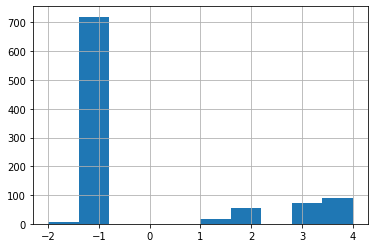

In [45]:
data_expL.rating.hist()

In [46]:
choiceFrameAll = pd.DataFrame( columns = ['trial','leftId','rightId','frame','endTime','choice','choiceTime','LRat1','RRat1','LRat2','RRat2','LVar1','RVar1','LVar2','RVar2','Part'])
idFrameAll = pd.DataFrame( columns = ['nameId','rat1','rat2','var1','var2','Part'])

In [47]:
for j in list (choiceFrameRawAll.part.unique()):
    
    idNames = list(rateFrameRawAll.picId.unique())
    IdRatings1 = [None]*len(idNames)
    IdRatings2 = [None]*len(idNames)
    IdRatingsVar1 = [None]*len(idNames)
    IdRatingsVar2 = [None]*len(idNames)
    IdRatingsAll1 = [None]*len(idNames)
    IdRatingsAll2 = [None]*len(idNames)

    #extract average rating for like, dislike
    for i in range(len(idNames)):
        IdRatings1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()
        IdRatings2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()
        #print(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating)
        IdRatingsVar1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()
        IdRatingsVar2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()

        IdRatingsAll1[i] = np.array(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.values)
        IdRatingsAll2[i] = np.array(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.values)
    
        
    rateValues = pd.DataFrame( {'nameId': idNames,'rat1': IdRatings1,'rat2': IdRatings2,'var1': IdRatingsVar1,'var2': IdRatingsVar2,'AllRatings1':IdRatingsAll1,'AllRatings2':IdRatingsAll2})
    rateValues['Part'] = [j]*len(rateValues)    
    
    # save information about celebs and ratings
    
    idFrameAll = pd.concat([idFrameAll,rateValues],ignore_index=True)
    
    choiceFrames = choiceFrameRawAll.loc[ (choiceFrameRawAll['part'] == j)]
    
    # separate ratings and rating-variability for each frame
    ChoiceLRat1 = [None]*len(choiceFrames)
    ChoiceRRat1 = [None]*len(choiceFrames)
    ChoiceLRat2 = [None]*len(choiceFrames)
    ChoiceRRat2 = [None]*len(choiceFrames)

    ChoiceLVar1 = [None]*len(choiceFrames)
    ChoiceRVar1 = [None]*len(choiceFrames)
    ChoiceLVar2 = [None]*len(choiceFrames)
    ChoiceRVar2 = [None]*len(choiceFrames)
    
    for i in range(len(choiceFrames)):
        
        choiceL = choiceFrames.iloc[i].leftId
        choiceR = choiceFrames.iloc[i].rightId
        
        if any((rateValues['nameId'] == choiceL)) and any((rateValues['nameId'] == choiceR)):
        
            ChoiceLRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat1.values[0]
            ChoiceRRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat1.values[0]
            ChoiceLRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat2.values[0]
            ChoiceRRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat2.values[0]
            
            ChoiceLVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var1.values[0]
            ChoiceRVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var1.values[0]
            ChoiceLVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var2.values[0]
            ChoiceRVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var2.values[0]

    choiceFrames['LRat1'] = ChoiceLRat1
    choiceFrames['RRat1'] = ChoiceRRat1
    choiceFrames['LRat2'] = ChoiceLRat2
    choiceFrames['RRat2'] = ChoiceRRat2 
    
    choiceFrames['LVar1'] = ChoiceLVar1
    choiceFrames['RVar1'] = ChoiceRVar1
    choiceFrames['LVar2'] = ChoiceLVar2
    choiceFrames['RVar2'] = ChoiceRVar2
     
    choiceFrames['Part'] = [j]*len(choiceFrames)    

    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)
    

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [48]:
choiceFrameAll

,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,choice,...,rightId,session,trial,trialEnd,trialOnset,trialOnsetTim,trialRespTime,trialSnd1Tim,trialSnd2Tim,trialThinkTime
0,1.666667,2.833333,0.516398,0.752773,3,2.333333,2.666667,0.516398,0.516398,1.0,...,2.0,0.0,0.0,10.013129,122.379519,0.008605,3.507591,1.020741,1.521760,3.507088
1,1.500000,2.666667,0.547723,0.816497,3,1.666667,2.833333,0.516398,0.752773,1.0,...,6.0,0.0,1.0,11.006220,132.529415,0.010511,3.515657,1.030361,1.531569,3.515307
2,1.666667,2.833333,0.516398,0.752773,3,2.333333,2.666667,0.516398,0.516398,1.0,...,2.0,0.0,2.0,12.000181,144.129619,0.006901,3.509187,1.023841,1.525057,3.508854
3,1.500000,2.666667,0.547723,0.816497,3,1.666667,2.833333,0.516398,0.752773,-1.0,...,6.0,0.0,3.0,12.010674,157.180464,0.006823,3.502245,1.034679,1.535908,3.501897
4,1.500000,2.666667,0.547723,0.816497,3,2.333333,2.666667,0.516398,0.516398,1.0,...,2.0,0.0,4.0,10.001466,187.631265,0.007589,3.511215,1.038964,1.540185,3.510868
5,1.666667,2.833333,0.516398,0.752773,3,3.333333,1.833333,0.816497,0.752773,-1.0,...,1.0,0.0,5.0,10.009919,197.781366,0.007228,3.504151,1.035491,1.536166,3.503705
6,1.500000,2.666667,0.547723,0.816497,3,2.333333,2.666667,0.516398,0.516398,-1.0,...,2.0,0.0,6.0,10.001733,212.938596,0.006912,3.510373,1.024092,1.525351,3.510023
7,1.666667,2.833333,0.516398,0.752773,3,3.333333,1.833333,0.816497,0.752773,1.0,...,1.0,0.0,7.0,10.005940,252.883446,0.007138,3.516123,1.026983,1.527822,3.515772
8,1.666667,2.833333,0.516398,0.752773,3,2.333333,2.666667,0.516398,0.516398,-1.0,...,2.0,0.0,8.0,10.003783,290.584396,0.007242,3.515061,1.029417,1.530323,3.514709
9,3.333333,1.833333,0.816497,0.752773,3,1.500000,2.666667,0.547723,0.816497,1.0,...,5.0,0.0,9.0,11.008006,334.085507,0.007195,3.501660,1.032670,1.533854,3.501311


# Save file

In [49]:
idFrameAll

,AllRatings1,AllRatings2,Part,nameId,rat1,rat2,var1,var2
0,"[3.0, 2.0, 3.0, 2.0, 2.0, 2.0]","[3.0, 2.0, 2.0, 3.0, 3.0, 3.0]",3,2.0,2.333333,2.666667,0.516398,0.516398
1,"[1.0, 1.0, 2.0, 2.0, 1.0, 2.0]","[2.0, 3.0, 2.0, 2.0, 3.0, 4.0]",3,5.0,1.500000,2.666667,0.547723,0.816497
2,"[4.0, 3.0, 4.0, 2.0, 3.0, 4.0]","[2.0, 1.0, 1.0, 3.0, 2.0, 2.0]",3,1.0,3.333333,1.833333,0.816497,0.752773
3,"[2.0, 2.0, 2.0, 2.0, 1.0, 1.0]","[2.0, 2.0, 3.0, 3.0, 4.0, 3.0]",3,6.0,1.666667,2.833333,0.516398,0.752773
4,"[4.0, 3.0, 3.0, 3.0, 4.0, 3.0]","[2.0, 2.0, 3.0, 3.0, 2.0, 3.0]",4,2.0,3.333333,2.500000,0.516398,0.547723
5,"[2.0, 3.0, 2.0, 2.0, 3.0, 2.0]","[2.0, 3.0, 2.0, 3.0, 2.0, 2.0]",4,5.0,2.333333,2.333333,0.516398,0.516398
6,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0]","[4.0, 3.0, 3.0, 4.0, 4.0, 3.0]",4,1.0,3.833333,3.500000,0.408248,0.547723
7,"[2.0, 2.0, 2.0, 1.0, 2.0, 1.0]","[1.0, 2.0, 2.0, 1.0, 2.0, 1.0]",4,6.0,1.666667,1.500000,0.516398,0.547723
8,"[2.0, 4.0, 4.0, 4.0, 2.0, 3.0]","[4.0, 1.0, 1.0, 1.0, 2.0, 2.0]",5,2.0,3.166667,1.833333,0.983192,1.169045
9,"[2.0, 4.0, 4.0, 3.0, 2.0, 3.0]","[1.0, 1.0, 1.0, 2.0, 2.0, 1.0]",5,5.0,3.000000,1.333333,0.894427,0.516398


In [50]:
choiceFrameAll.loc[(choiceFrameAll['Part'] == 5)]

,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,choice,...,rightId,session,trial,trialEnd,trialOnset,trialOnsetTim,trialRespTime,trialSnd1Tim,trialSnd2Tim,trialThinkTime
288,3.000000,1.333333,0.894427,0.516398,5,3.166667,1.833333,0.983192,1.169045,-1.0,...,2.0,0.0,0.0,12.005064,153.283401,0.007656,3.514461,1.017470,1.517946,3.514256
289,3.166667,1.833333,0.983192,1.169045,5,3.333333,1.800000,1.032796,1.303840,NaN,...,1.0,0.0,1.0,12.015611,186.634779,0.007888,3.508055,1.036552,1.537079,3.507854
290,3.000000,1.333333,0.894427,0.516398,5,3.333333,1.800000,1.032796,1.303840,-1.0,...,1.0,0.0,2.0,11.015460,227.236437,0.007515,3.508399,1.040135,1.540240,3.508186
291,3.833333,1.000000,0.408248,0.000000,5,3.333333,1.800000,1.032796,1.303840,1.0,...,1.0,0.0,3.0,11.006566,256.237530,0.007520,3.516576,1.026284,1.526721,3.516368
292,3.000000,1.333333,0.894427,0.516398,5,3.166667,1.833333,0.983192,1.169045,1.0,...,2.0,0.0,4.0,12.000505,267.837741,0.007319,3.509313,1.027879,1.528016,3.509060
293,3.833333,1.000000,0.408248,0.000000,5,3.000000,1.333333,0.894427,0.516398,-1.0,...,5.0,0.0,5.0,10.005214,295.388340,0.007820,3.516152,1.030503,1.530847,3.515929
294,3.833333,1.000000,0.408248,0.000000,5,3.333333,1.800000,1.032796,1.303840,1.0,...,1.0,0.0,6.0,10.012952,310.543815,0.007208,3.506531,1.026526,1.526906,3.506330
295,3.000000,1.333333,0.894427,0.516398,5,3.333333,1.800000,1.032796,1.303840,-1.0,...,1.0,0.0,7.0,10.009746,321.489910,0.006989,3.503413,1.031328,1.531797,3.503210
296,3.333333,1.800000,1.032796,1.303840,5,3.833333,1.000000,0.408248,0.000000,-1.0,...,6.0,0.0,8.0,10.008419,338.889459,0.006983,3.502809,1.034299,1.534813,3.502604
297,3.833333,1.000000,0.408248,0.000000,5,3.166667,1.833333,0.983192,1.169045,1.0,...,2.0,0.0,9.0,10.009564,360.640584,0.007534,3.503922,1.034493,1.534637,3.503721


In [51]:
choiceFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_Choice_ScanPart_All.csv',index = False)
idFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_idRatingsFrame_ScanPart_All.csv',index = False)

## -- [end ] 